# Braga Incidents - Data Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import statistics

## Import Dataset

In [2]:
df = pd.read_csv('Traffic_Incidents_Braga_Until_20191231.csv')
print(df.head(5))

  city_name         description cause_of_incident  \
0     Braga     queuing traffic               NaN   
1     Braga     queuing traffic               NaN   
2     Braga     queuing traffic               NaN   
3     Braga  stationary traffic               NaN   
4     Braga  stationary traffic               NaN   

                                from_road  \
0                        Quinteiro (N103)   
1         Rua Manuel Almeida Passos (N14)   
2                   Braga-Circular (N101)   
3  Avenida General Norton De Matos (N101)   
4                           Cm1327 (N201)   

                                  to_road affected_roads  \
0       Braga-Circular (Ferreiros) (N103)           N103   
1      Rua Da Quinta De Santa Maria (N14)            N14   
2  Avenida General Norton De Matos (N101)           N101   
3                   Braga-Circular (N101)           N101   
4               N201 (Rua De Cima) (N201)           N201   

  incident_category_desc magnitude_of_delay_desc 

## Data Quality

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83347 entries, 0 to 83346
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                83347 non-null  object 
 1   description              83347 non-null  object 
 2   cause_of_incident        426 non-null    object 
 3   from_road                83347 non-null  object 
 4   to_road                  83347 non-null  object 
 5   affected_roads           40981 non-null  object 
 6   incident_category_desc   83347 non-null  object 
 7   magnitude_of_delay_desc  83347 non-null  object 
 8   length_in_meters         83347 non-null  int64  
 9   delay_in_seconds         83347 non-null  int64  
 10  incident_date            83347 non-null  object 
 11  latitude                 83347 non-null  float64
 12  longitude                83347 non-null  float64
dtypes: float64(2), int64(2), object(9)
memory usage: 8.3+ MB


In [4]:
#Ver se existe alguma row duplicada no dataset
df[df.duplicated(subset=None, keep=False) == True].count()

city_name                  290
description                290
cause_of_incident            0
from_road                  290
to_road                    290
affected_roads             166
incident_category_desc     290
magnitude_of_delay_desc    290
length_in_meters           290
delay_in_seconds           290
incident_date              290
latitude                   290
longitude                  290
dtype: int64

In [5]:
#ver missing values dentro do dataset
df.isnull().sum()

city_name                      0
description                    0
cause_of_incident          82921
from_road                      0
to_road                        0
affected_roads             42366
incident_category_desc         0
magnitude_of_delay_desc        0
length_in_meters               0
delay_in_seconds               0
incident_date                  0
latitude                       0
longitude                      0
dtype: int64

## Exploration Data

In [6]:
cols = ['length_in_meters','delay_in_seconds','latitude','longitude']
np.round(df[cols].describe(), 2).T[['mean', 'std', 'min', 'max',"25%","50%","75%"]]

,mean,std,min,max,25%,50%,75%
length_in_meters,2439.61,192698.10,14.00,19670230.00,234.00,456.00,848.00
delay_in_seconds,143.73,168.62,0.00,5176.00,0.00,129.00,210.00
latitude,41.55,0.02,41.48,42.37,41.54,41.55,41.56
longitude,-8.43,1.03,-87.90,-8.37,-8.43,-8.42,-8.40


## Magnitude of Delay

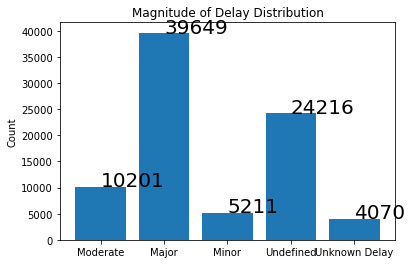

In [7]:
MD1 = df[df['magnitude_of_delay_desc']=='Moderate']
MD1 = MD1['magnitude_of_delay_desc'].count()
MD2 = df[df['magnitude_of_delay_desc']=='Major']
MD2 = MD2['magnitude_of_delay_desc'].count()
MD3 = df[df['magnitude_of_delay_desc']=='Minor']
MD3 = MD3['magnitude_of_delay_desc'].count()
MD4 = df[df['magnitude_of_delay_desc']=='Undefined']
MD4 = MD4['magnitude_of_delay_desc'].count()
MD5 = df[df['magnitude_of_delay_desc']=='Unknown Delay']
MD5 = MD5['magnitude_of_delay_desc'].count()

objects = ('Moderate', 'Major','Minor','Undefined','Unknown Delay')
Count = [MD1, MD2, MD3, MD4, MD5]
y_pos = np.arange(len(objects))

plt.bar(objects, Count)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Magnitude of Delay Distribution')


for index,data in enumerate(Count):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))

plt.show()

In [8]:
alll = MD1 + MD2 + MD3 + MD4 + MD5
print("Moderate Probability:", round(MD1/(alll)*100,2),"%")
print("Major Probability:", round(MD2/(alll)*100,2),"%")
print("Minor Probability:", round(MD3/(alll)*100,2),"%")
print("Undefined Probability:", round(MD4/(alll)*100,2),"%")
print("Unknown Probability:", round(MD5/(alll)*100,2),"%")

Moderate Probability: 12.24 %
Major Probability: 47.57 %
Minor Probability: 6.25 %
Undefined Probability: 29.05 %
Unknown Probability: 4.88 %


## Length in Meters

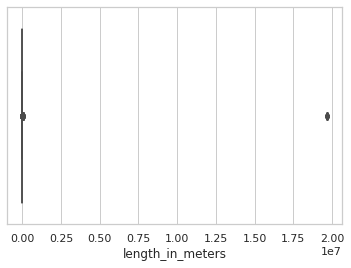

In [9]:
sns.set_theme(style="whitegrid")
tips = df
ax = sns.boxplot(x=tips["length_in_meters"])

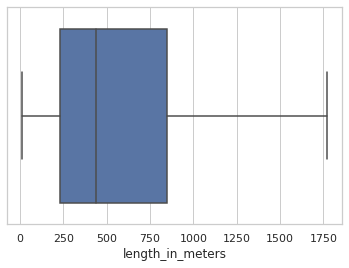

In [10]:
Q1 = df['length_in_meters'].quantile(0.25)
Q3 = df['length_in_meters'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['length_in_meters'] >= Q1 - 1.5 * IQR) & (df['length_in_meters'] <= Q3 + 1.5 *IQR)
#boxplot_1 = df.loc[filter].boxplot(column=['length_in_meters'])
#print(boxplot_1)  

sns.set_theme(style="whitegrid")
tips2 = df.loc[filter]
ax = sns.boxplot(x=tips2["length_in_meters"])

## Length in Meters by Magnitude of Delay

AxesSubplot(0.125,0.125;0.775x0.755)


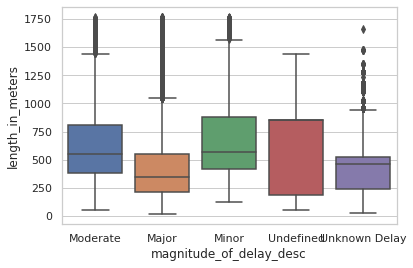

In [11]:
ax = sns.boxplot(x="magnitude_of_delay_desc", y="length_in_meters", data=tips2)
print(ax)

## Delay in Seconds by Magnitude of Delay

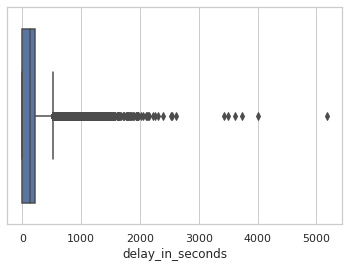

In [12]:
sns.set_theme(style="whitegrid")
tips = df
ax = sns.boxplot(x=tips["delay_in_seconds"])

AxesSubplot(0.125,0.125;0.775x0.755)


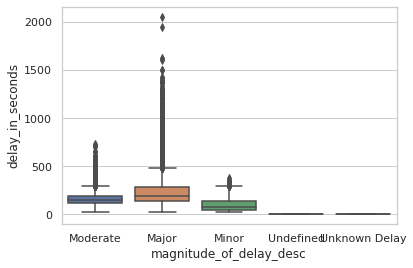

In [13]:
ax = sns.boxplot(x="magnitude_of_delay_desc", y="delay_in_seconds", data=tips2)
print(ax)

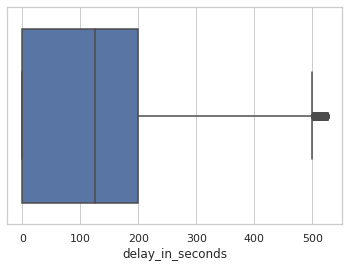

In [14]:
Q1 = df['delay_in_seconds'].quantile(0.25)
Q3 = df['delay_in_seconds'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['delay_in_seconds'] >= Q1 - 1.5 * IQR) & (df['delay_in_seconds'] <= Q3 + 1.5 *IQR)
#boxplot_1 = df.loc[filter].boxplot(column=['length_in_meters'])
#print(boxplot_1)  

sns.set_theme(style="whitegrid")
tips2 = df.loc[filter]
ax = sns.boxplot(x=tips2["delay_in_seconds"])

AxesSubplot(0.125,0.125;0.775x0.755)


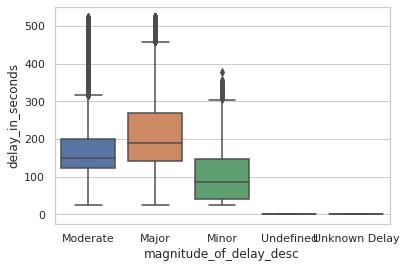

In [15]:
ax = sns.boxplot(x="magnitude_of_delay_desc", y="delay_in_seconds", data=tips2)
print(ax)